In [15]:
# Housing Data Analysis Notebook

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
# Read the data
df = pd.read_csv('Housing.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()


Dataset Shape: (545, 13)

First few rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
# Check data types and missing values
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [18]:
# Statistical summary
print("\nNumerical Columns Summary:")
df.describe()


Numerical Columns Summary:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Unique values in categorical columns:

mainroad: ['yes' 'no']

guestroom: ['no' 'yes']

basement: ['no' 'yes']

hotwaterheating: ['no' 'yes']

airconditioning: ['yes' 'no']

prefarea: ['yes' 'no']

furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


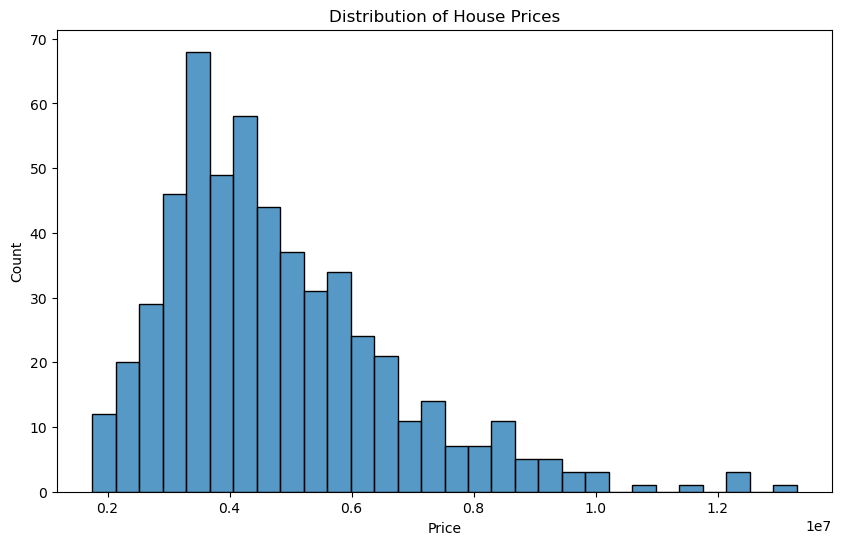

In [19]:
# Check unique values in categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")

# Price Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

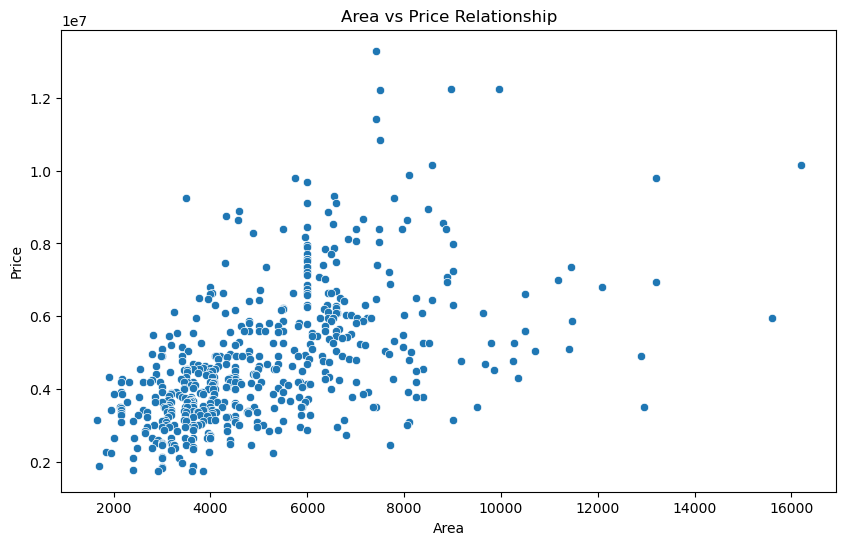

In [20]:
# Area vs Price Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Area vs Price Relationship')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

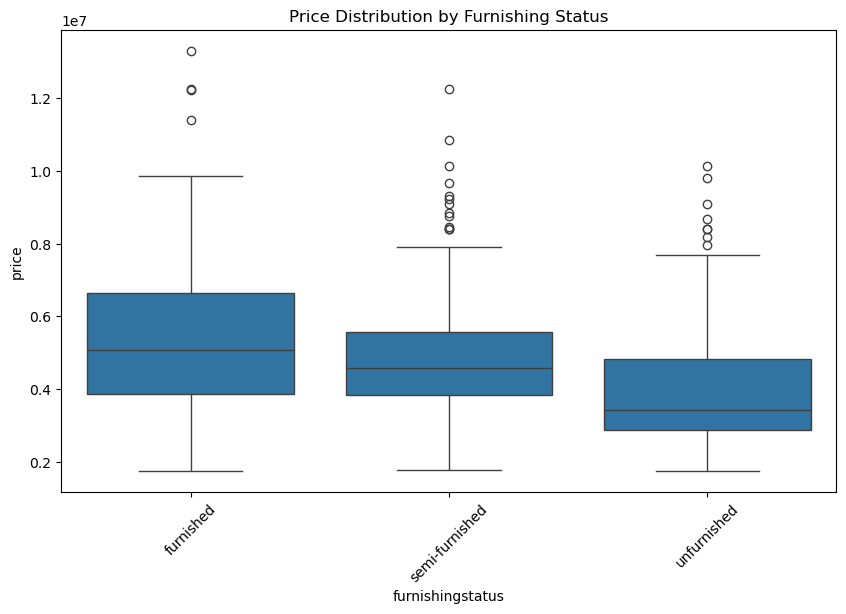

In [21]:
# Average price by furnishing status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='furnishingstatus', y='price')
plt.title('Price Distribution by Furnishing Status')
plt.xticks(rotation=45)
plt.show()

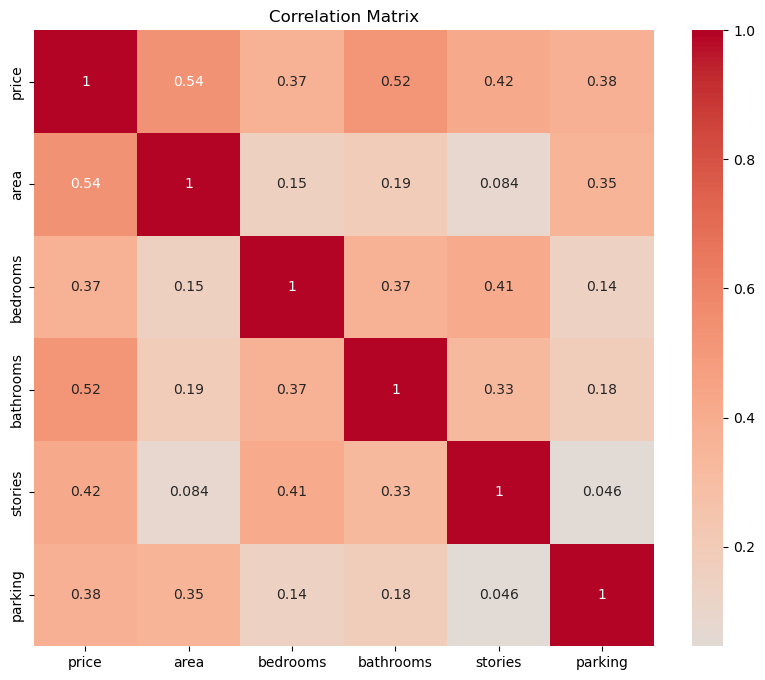

In [22]:
# Correlation Analysis
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
correlation = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Price per Square Foot Analysis
df['price_per_sqft'] = df['price'] / df['area']

print("\nPrice per Square Foot Statistics:")
print(df['price_per_sqft'].describe())
print(df.shape)


Price per Square Foot Statistics:
count     545.000000
mean      993.326978
std       346.537025
min       270.395550
25%       745.370370
50%       952.380952
75%      1184.615385
max      2640.000000
Name: price_per_sqft, dtype: float64
(545, 14)


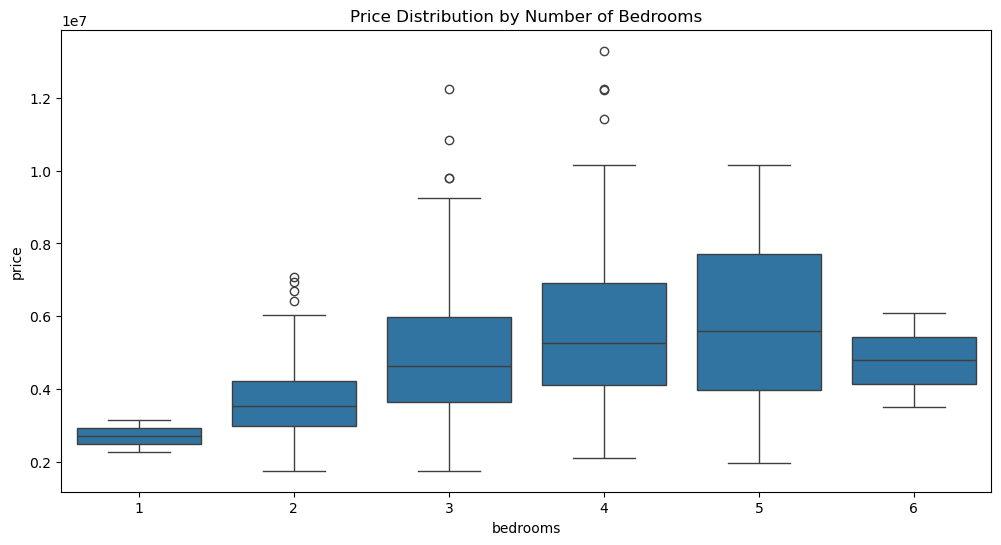

In [24]:
# Price distribution by number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')

plt.show()

In [25]:
# Additional Features Impact
feature_impact = {}
for col in categorical_cols:
    avg_price = df.groupby(col)['price'].mean()
    feature_impact[col] = avg_price

print("\nAverage Price by Features:")
for feature, prices in feature_impact.items():
    print(f"\n{feature}:")
    print(prices)

# Key Insights Summary
print("\nKey Insights:")
print("1. Dataset contains", len(df), "houses with", len(df.columns), "features")
print(f"2. Price range: {df['price'].min():,.0f} to {df['price'].max():,.0f}")
print(f"3. Average house price: {df['price'].mean():,.0f}")
print(f"4. Most common number of bedrooms:", df['bedrooms'].mode()[0])
print(f"5. Most common furnishing status:", df['furnishingstatus'].mode()[0])
print(f"6. Percentage of houses on main road: {(df['mainroad'] == 'yes').mean()*100:.1f}%")


Average Price by Features:

mainroad:
mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

guestroom:
guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

basement:
basement
no     4.509966e+06
yes    5.242615e+06
Name: price, dtype: float64

hotwaterheating:
hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64

airconditioning:
airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64

prefarea:
prefarea
no     4.425299e+06
yes    5.879046e+06
Name: price, dtype: float64

furnishingstatus:
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64

Key Insights:
1. Dataset contains 545 houses with 14 features
2. Price range: 1,750,000 to 13,300,000
3. Average house price: 4,766,729
4. Most common number of bedrooms: 3
5. Most common furnishing status: semi-furnished
6. Percentage of houses on main ro

In [26]:
df.shape

(545, 14)